In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy, os, datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.quantile_regression import QuantReg
%matplotlib inline

gcolour=[0.9,0.5, 0.0];
ngcolour=[0.9, 0.6, 0.0];
scolour=[0.6, 0.2, 0];
jcolour=[0.25, 1.0, 0.0];
pjcolour=[0.0, 0.5, 0.0];
pjgcolour=[0.2, 0.5, 0.0];
pcolour=[0.5, 0.5, 1.0];
mcolour=[0.0, 0.0, 0.6];
siteColors = [gcolour, scolour, jcolour, pjcolour, pcolour, mcolour]
dataDir = '/home/nikko/Research/Data/TowerData/AmerifluxFiles/Products/DailyGreg/'
halfHourlyData = '/home/nikko/Research/Data/TowerData/AmerifluxFiles/'

anomDates = pd.read_csv('VPD_anom_dates.csv', parse_dates=True)
anomDates['dt'] = anomDates['TIMESTAMP'].apply(lambda x: pd.to_datetime(str(x),'%Y%M%D%H%M%S'))
anomDates.index = anomDates.dt
anomDates['MONTH'] = anomDates.index.month
anomDates['DOY'] = anomDates.index.dayofyear
anomDates['HOUR'] = anomDates.index.hour
anomDates['SECOND'] = anomDates.index.second


In [137]:
# quick generator function to spit out file names for a given path
def files(path):
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)):
            yield file

# Function to parse sitename from AMFLUX filenames
def getSiteName(filename):
    sitename = filename.split('-')[1].split('_')[0]
    return sitename

def fitLinRegression(sitename, filetype, year, day_start, day_stop):
    idx = 0
    slope = []
    intercept = []
    fitstats = []
    sigvalues_a = []
    sigvalues_b = []
    fitday = []
    specificSite = [s for s in filelist if sitename in s]
    siteSubset = [s for s in specificSite if filetype in s]
    yearSubset = [s for s in siteSubset if year in s]
    tempheader = pd.read_csv(halfHourlyData + yearSubset[0], sep = ',', skiprows = 3, parse_dates=True)
    dataDict = pd.read_csv(halfHourlyData + yearSubset[0], sep = ',', skiprows = 4, parse_dates=True)
    headernames = list(tempheader.columns)
    dataDict.columns = headernames
    dataDict['dt'] = dataDict['TIMESTAMP'].apply(lambda x: pd.to_datetime(str(x),'%Y%M%D%H%M%S'))
    dataDict.index = dataDict.dt
    dataDict['MONTH'] = dataDict.index.month
    dataDict['DOY'] = dataDict.index.dayofyear
    dataDict['HOUR'] = dataDict.index.hour
    dataDict['SECOND'] = dataDict.index.second
    
    for day in numpy.arange(day_start, day_stop, 1):
        dailyData = dataDict[dataDict['DOY'] == day]
        ols = smf.ols('GPP ~ PAR', dailyData).fit()
        ols_ci = ols.conf_int().ix['PAR'].tolist()
        olsdict = dict(a = ols.params['Intercept'],
               b = ols.params['PAR'],
               lb = ols_ci[0],
               ub = ols_ci[1])
        slope.append(ols.params['PAR'])
        intercept.append(ols.params['Intercept'])
        fitstats.append(ols.rsquared)
        sigvalues_a.append(ols.pvalues[0])
        sigvalues_b.append(ols.pvalues[1])
        fitday.append(day)
    idx = idx + 1
    return intercept, slope, sigvalues_a, sigvalues_b

def siteBinner(YEAR, SITE, toBin, binBy, numberOfBins, dailyData):
    for binidx in arange(0,numberOfBins):
        binmean = nanmean(testdf[toBin][(testdf[binby] > (binstep * binidx)) & (testdf[binby] < (binstep * binidx + 1))])
        #print testdf[binby]
        #print testdf[toBin][(testdf[binby] > (binstep * binidx)) & (testdf[binby] < (binstep * binidx + 1))]
        binvar = (nanvar(testdf[toBin][(testdf[binby] > (binstep * binidx)) & (testdf[binby] < (binstep * binidx + 1))]))**(1/2)
        binob = len(testdf[toBin][(testdf[binby] > (binstep * binidx)) & (testdf[binby] < (binstep * binidx + 1))])
        if binob > 10:
            xbinvec.append(binstep*binidx)
            ybinvec.append(binmean)
            toperr.append(binmean + 1.96 * (sqrt(binvar)/sqrt(binob)))
            bottomerr.append(binmean - 1.96 * (sqrt(binvar)/sqrt(binob)))
            #toperr.append(binmean + sqrt(binvar)/sqrt(binob))
            #bottomerr.append(binmean - sqrt(binvar)/sqrt(binob))

    outputDict = pd.DataFrame(dict(YEAR = YEAR, SITE = SITE, VAR = binBy, xdata = xbinvec, ydata = ybinvec, 
                                   toperror = toperr, bottomerror = bottomerr))
    return outputDict

    
def fitBinnedLinRegression(sitename, filetype, year, day_start, day_stop,
                          toBin, binBy, numberOfBins):
    idx = 0
    slope = []
    intercept = []
    fitstats = []
    sigvalues_a = []
    sigvalues_b = []
    fitday = []
    toBin = toBin
    binby = binBy
    numberOfBins = numberOfBins
    xbinvec = []
    ybinvec = []
    binobs = []
    toperr = []
    bottomerr = []
    error = []
    specificSite = [s for s in filelist if sitename in s]
    siteSubset = [s for s in specificSite if filetype in s]
    yearSubset = [s for s in siteSubset if year in s]
    tempheader = pd.read_csv(halfHourlyData + yearSubset[0], sep = ',', skiprows = 3, parse_dates=True)
    dataDict = pd.read_csv(halfHourlyData + yearSubset[0], sep = ',', skiprows = 4, parse_dates=True)
    headernames = list(tempheader.columns)
    dataDict.columns = headernames
    dataDict['dt'] = dataDict['TIMESTAMP'].apply(lambda x: pd.to_datetime(str(x),'%Y%M%D%H%M%S'))
    dataDict.index = dataDict.dt
    dataDict['MONTH'] = dataDict.index.month
    dataDict['DOY'] = dataDict.index.dayofyear
    dataDict['HOUR'] = dataDict.index.hour
    dataDict['SECOND'] = dataDict.index.second
    
    dailyData = dataDict[(dataDict['DOY'] >= day_start) & (dataDict['DOY'] <= day_stop)]
    dailyData = dailyData[dailyData['PAR'] > 0]
    dailyData = dailyData[dailyData.GPP >= 0]
    dailyData = dailyData[dailyData.TA_F >= -100]

    binmin = dailyData[binby].min()
    binmax = dailyData[binby].max()
    
    binstep = (binmax - binmin) / numberOfBins
    binrange = numpy.arange(binmin, binmax, binstep)
    for binidx in numpy.arange(0,numberOfBins-1):
        
        binmean = numpy.nanmean(dailyData[toBin][(dailyData[binby] > 
            (binrange[binidx])) & (dailyData[binby] < binrange[binidx + 1])])
        binvar = (numpy.nanvar(dailyData[toBin][(dailyData[binby] > 
            (binrange[binidx])) & (dailyData[binby] < binrange[binidx + 1])]))**(1/2)
        binob = len(dailyData[toBin][(dailyData[binby] > 
            (binrange[binidx])) & (dailyData[binby] < binrange[binidx + 1])])
        #if binob > 10:
        xbinvec.append(binstep*binidx)
        ybinvec.append(binmean)
        toperr.append(binmean + 1.96 * (numpy.sqrt(binvar)/numpy.sqrt(binob)))
        bottomerr.append(binmean - 1.96 * (numpy.sqrt(binvar)/numpy.sqrt(binob)))
        error.append(numpy.sqrt(binvar)/numpy.sqrt(binob))
        #toperr.append(binmean + sqrt(binvar)/sqrt(binob))
        #bottomerr.append(binmean - sqrt(binvar)/sqrt(binob))

    outputDict = pd.DataFrame(dict(VAR = binBy, xdata = xbinvec, ydata = ybinvec, 
                                   error = error, toperror = toperr, bottomerror = bottomerr))

#    ols = smf.ols('GPP ~ PAR', dailyData).fit()
#    ols_ci = ols.conf_int().ix['PAR'].tolist()
#    olsdict = dict(a = ols.params['Intercept'],
#           b = ols.params['PAR'],
#           lb = ols_ci[0],
#           ub = ols_ci[1])
#    slope.append(ols.params['PAR'])
#    intercept.append(ols.params['Intercept'])
#    fitstats.append(ols.rsquared)
#    sigvalues_a.append(ols.pvalues[0])
#    sigvalues_b.append(ols.pvalues[1])
    return outputDict

In [136]:
anomDates[(anomDates.Seg == True) & (anomDates.Ses == True) & (anomDates.Wjs == True)
         & (anomDates.Mpj == True) & (anomDates.Vcp == True) & (anomDates.Vcm == True)]



,TIMESTAMP,Mpj,Seg,Ses,Vcm,Vcp,Wjs,dt,MONTH,DOY,HOUR,SECOND
dt,,,,,,,,,,,,
2008-07-29,2008-07-29,True,True,True,True,True,True,2008-07-29,7,211,0,0
2008-07-30,2008-07-30,True,True,True,True,True,True,2008-07-30,7,212,0,0
2008-07-31,2008-07-31,True,True,True,True,True,True,2008-07-31,7,213,0,0
2008-08-01,2008-08-01,True,True,True,True,True,True,2008-08-01,8,214,0,0
2009-07-11,2009-07-11,True,True,True,True,True,True,2009-07-11,7,192,0,0
2009-07-12,2009-07-12,True,True,True,True,True,True,2009-07-12,7,193,0,0
2009-07-13,2009-07-13,True,True,True,True,True,True,2009-07-13,7,194,0,0
2009-07-14,2009-07-14,True,True,True,True,True,True,2009-07-14,7,195,0,0
2009-07-15,2009-07-15,True,True,True,True,True,True,2009-07-15,7,196,0,0


Ses
Seg
Wjs
Mpj


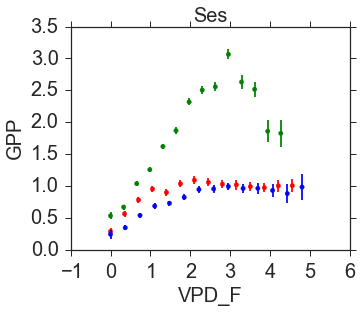

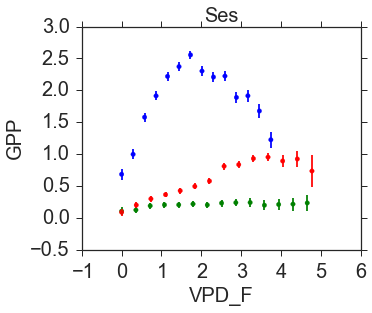

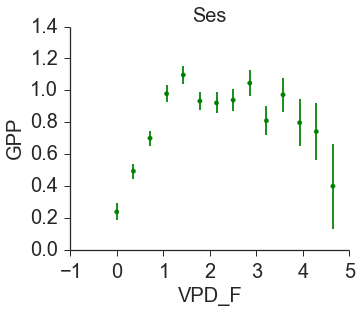

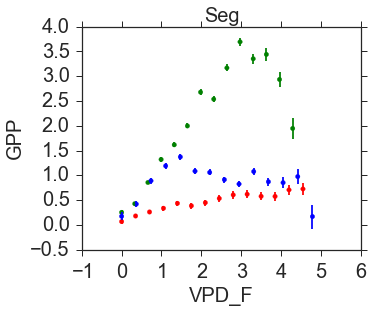

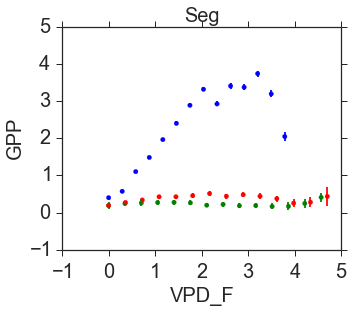

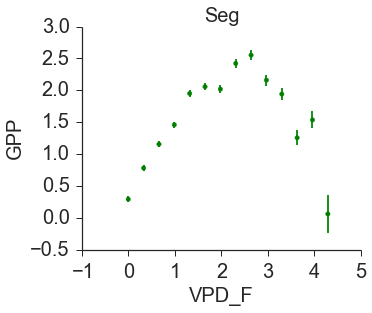

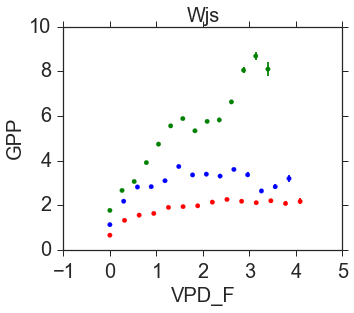

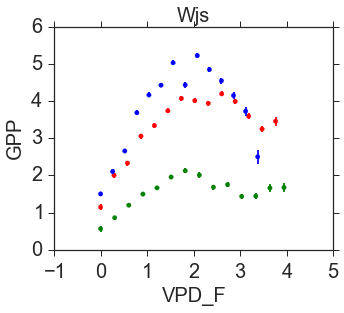

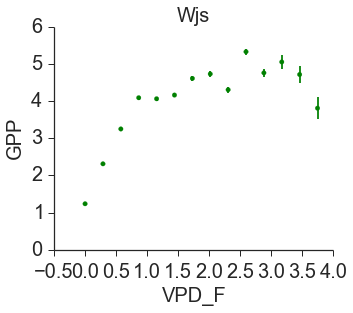

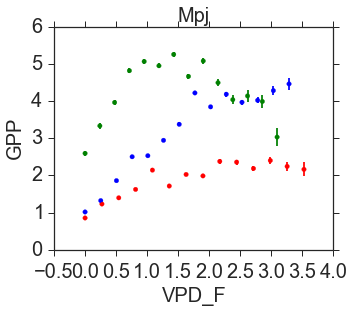

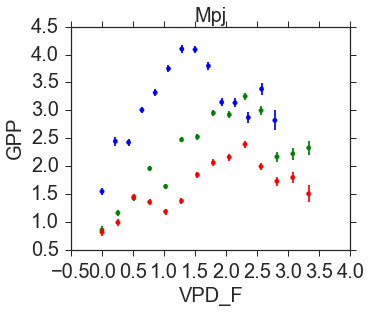

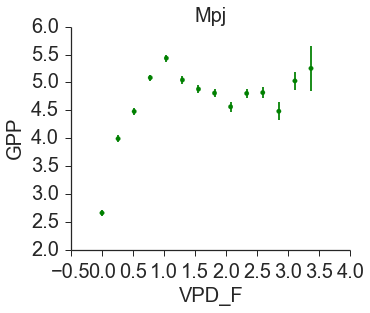

In [142]:
sites = ['Ses','Seg','Wjs','Mpj']
for site in sites:
    print site
    binnedDF_2008 = fitBinnedLinRegression(site, 
                    'gapfilled','2008', 182,273, 'GPP', 'VPD_F', 15)
    binnedDF_2009 = fitBinnedLinRegression(site, 
                        'gapfilled','2009', 182,273, 'GPP', 'VPD_F', 15)
    binnedDF_2010 = fitBinnedLinRegression(site, 
                        'gapfilled','2010', 182,273, 'GPP', 'VPD_F', 15)
    binnedDF_2011 = fitBinnedLinRegression(site, 
                        'gapfilled','2011', 182,273, 'GPP', 'VPD_F', 15)
    binnedDF_2012 = fitBinnedLinRegression(site, 
                        'gapfilled','2012', 182,273, 'GPP', 'VPD_F', 15)
    binnedDF_2013 = fitBinnedLinRegression(site, 
                        'gapfilled','2013', 182,273, 'GPP', 'VPD_F', 15)
    binnedDF_2014 = fitBinnedLinRegression(site, 
                        'gapfilled','2014', 182,273, 'GPP', 'VPD_F', 15)


    plt.figure
    fig, ax = plt.subplots(figsize=(5, 4))
    binnedDF_2008.plot(ax = ax, x = 'xdata', y = 'ydata', 
        yerr= binnedDF_2008.error, kind = 'scatter', color = 'green')
    binnedDF_2009.plot(ax = ax, x = 'xdata', y = 'ydata', 
        yerr= binnedDF_2009.error, kind = 'scatter', color = 'red')
    binnedDF_2010.plot(ax = ax, x = 'xdata', y = 'ydata', 
        yerr= binnedDF_2010.error, kind = 'scatter', color = 'blue')
    ax.set_ylabel('GPP', fontsize = 20)
    ax.set_xlabel('VPD_F', fontsize = 20)
    ax.set_title(site, fontsize = 20)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.grid(False)
    
    plt.figure
    fig, ax = plt.subplots(figsize=(5, 4))
    binnedDF_2011.plot(ax = ax, x = 'xdata', y = 'ydata', 
        yerr= binnedDF_2011.error, kind = 'scatter', color = 'green')
    binnedDF_2012.plot(ax = ax, x = 'xdata', y = 'ydata', 
        yerr= binnedDF_2012.error, kind = 'scatter', color = 'red')
    binnedDF_2013.plot(ax = ax, x = 'xdata', y = 'ydata', 
        yerr= binnedDF_2013.error, kind = 'scatter', color = 'blue')
    ax.set_ylabel('GPP', fontsize = 20)
    ax.set_xlabel('VPD_F', fontsize = 20)
    ax.set_title(site, fontsize = 20)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.grid(False)

    plt.figure
    fig, ax = plt.subplots(figsize=(5, 4))
    binnedDF_2014.plot(ax = ax, x = 'xdata', y = 'ydata', 
        yerr= binnedDF_2014.error, kind = 'scatter', color = 'green')
    ax.set_ylabel('GPP', fontsize = 20)
    ax.set_xlabel('VPD_F', fontsize = 20)
    ax.set_title(site, fontsize = 20)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.grid(False)

    sns.despine()

    
# Check out the progression of VPD optimum at the PJ Girdle site during and following mortality --

Ses
Seg
Wjs
Mpj
Ses
Seg
Wjs
Mpj
Ses
Seg
Wjs
Mpj
Ses
Seg
Wjs
Mpj


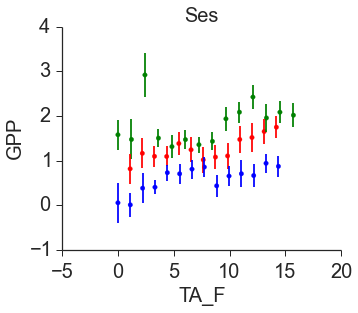

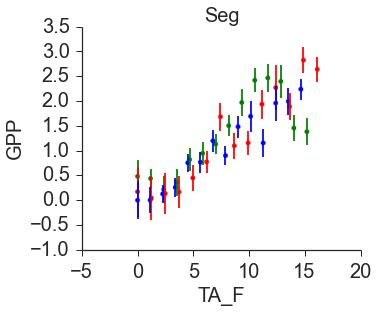

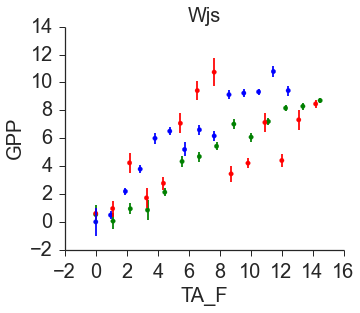

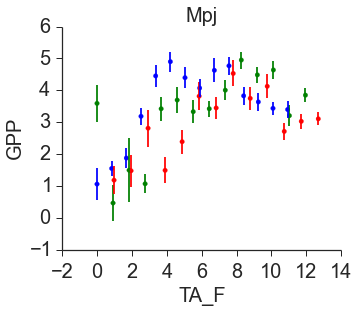

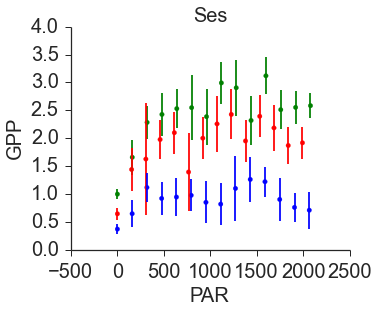

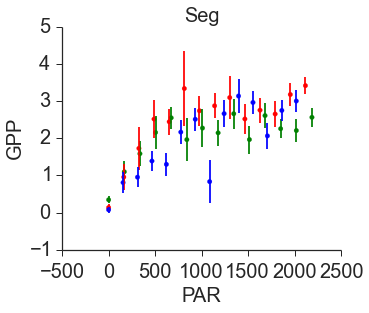

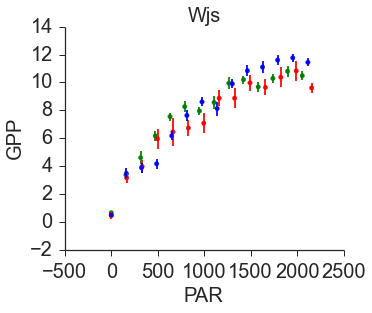

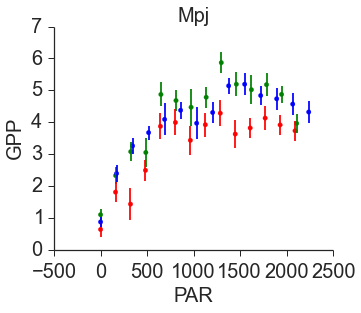

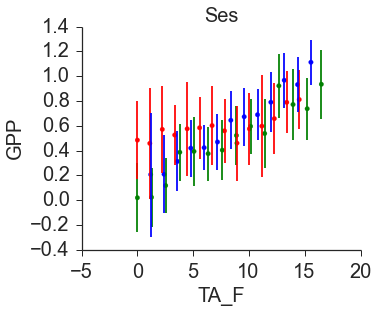

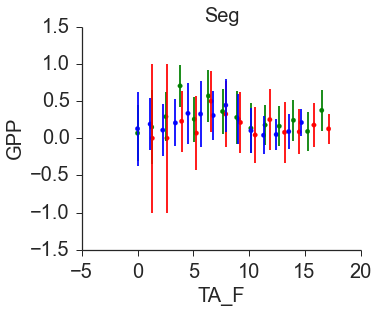

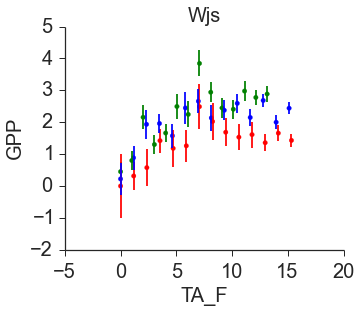

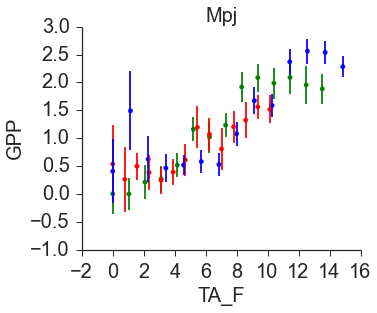

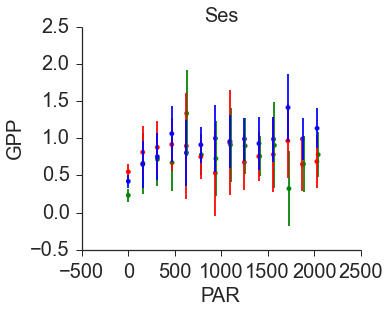

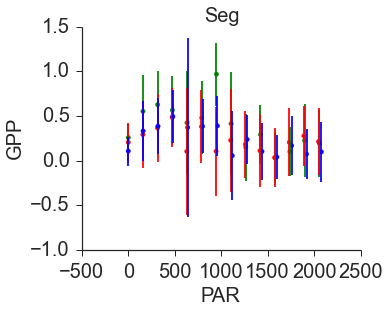

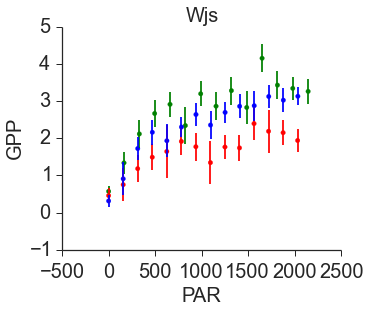

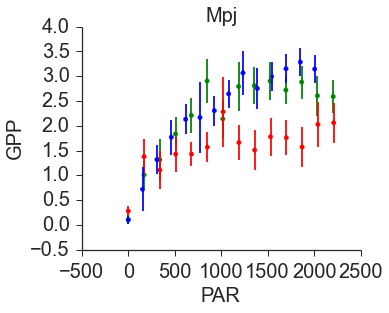

In [138]:

sites = ['Ses','Seg','Wjs','Mpj']
for site in sites:
    print site
    binnedDF_post = fitBinnedLinRegression(site, 
                    'gapfilled','2008', 215, 219, 'GPP', 'TA_F', 15)
    binnedDF_anom = fitBinnedLinRegression(site, 
                        'gapfilled','2008', 211, 214, 'GPP', 'TA_F', 15)
    binnedDF_pre = fitBinnedLinRegression(site, 
                        'gapfilled','2008', 205, 210, 'GPP', 'TA_F', 15)

    plt.figure
    fig, ax = plt.subplots(figsize=(5, 4))
    binnedDF_post.plot(ax = ax, x = 'xdata', y = 'ydata', 
        yerr= binnedDF_post.error, kind = 'scatter', color = 'green')
    binnedDF_anom.plot(ax = ax, x = 'xdata', y = 'ydata', 
        yerr= binnedDF_anom.error, kind = 'scatter', color = 'red')
    binnedDF_pre.plot(ax = ax, x = 'xdata', y = 'ydata', 
        yerr= binnedDF_pre.error, kind = 'scatter', color = 'blue')
    ax.set_ylabel('GPP', fontsize = 20)
    ax.set_xlabel('TA_F', fontsize = 20)
    ax.set_title(site, fontsize = 20)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.grid(False)

    sns.despine()
    
for site in sites:
    print site
    binnedDF_post = fitBinnedLinRegression(site, 
                    'gapfilled','2008', 215, 219, 'GPP', 'PAR', 15)
    binnedDF_anom = fitBinnedLinRegression(site, 
                        'gapfilled','2008', 211, 214, 'GPP', 'PAR', 15)
    binnedDF_pre = fitBinnedLinRegression(site, 
                        'gapfilled','2008', 205, 210, 'GPP', 'PAR', 15)

    plt.figure
    fig, ax = plt.subplots(figsize=(5, 4))
    binnedDF_post.plot(ax = ax, x = 'xdata', y = 'ydata', 
        yerr= binnedDF_post.error, kind = 'scatter', color = 'green')
    binnedDF_anom.plot(ax = ax, x = 'xdata', y = 'ydata', 
        yerr= binnedDF_anom.error, kind = 'scatter', color = 'red')
    binnedDF_pre.plot(ax = ax, x = 'xdata', y = 'ydata', 
        yerr= binnedDF_pre.error, kind = 'scatter', color = 'blue')
    ax.set_ylabel('GPP', fontsize = 20)
    ax.set_xlabel('PAR', fontsize = 20)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.set_title(site, fontsize = 20)
    ax.grid(False)

    sns.despine()
    
for site in sites:
    print site
    binnedDF_post = fitBinnedLinRegression(site, 
                    'gapfilled','2012', 183, 187, 'GPP', 'TA_F', 15)
    binnedDF_anom = fitBinnedLinRegression(site, 
                        'gapfilled','2012', 179, 182, 'GPP', 'TA_F', 15)
    binnedDF_pre = fitBinnedLinRegression(site, 
                        'gapfilled','2012', 173, 178, 'GPP', 'TA_F', 15)

    plt.figure
    fig, ax = plt.subplots(figsize=(5, 4))
    binnedDF_post.plot(ax = ax, x = 'xdata', y = 'ydata', 
        yerr= binnedDF_post.error, kind = 'scatter', color = 'green')
    binnedDF_anom.plot(ax = ax, x = 'xdata', y = 'ydata', 
        yerr= binnedDF_anom.error, kind = 'scatter', color = 'red')
    binnedDF_pre.plot(ax = ax, x = 'xdata', y = 'ydata', 
        yerr= binnedDF_pre.error, kind = 'scatter', color = 'blue')
    ax.set_ylabel('GPP', fontsize = 20)
    ax.set_xlabel('TA_F', fontsize = 20)
    ax.set_title(site, fontsize = 20)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.grid(False)

    sns.despine()
    
for site in sites:
    print site
    binnedDF_post = fitBinnedLinRegression(site, 
                    'gapfilled','2012', 183, 187, 'GPP', 'PAR', 15)
    binnedDF_anom = fitBinnedLinRegression(site, 
                        'gapfilled','2012', 179, 182, 'GPP', 'PAR', 15)
    binnedDF_pre = fitBinnedLinRegression(site, 
                        'gapfilled','2012', 173, 178, 'GPP', 'PAR', 15)

    plt.figure
    fig, ax = plt.subplots(figsize=(5, 4))
    binnedDF_post.plot(ax = ax, x = 'xdata', y = 'ydata', 
        yerr= binnedDF_post.error, kind = 'scatter', color = 'green')
    binnedDF_anom.plot(ax = ax, x = 'xdata', y = 'ydata', 
        yerr= binnedDF_anom.error, kind = 'scatter', color = 'red')
    binnedDF_pre.plot(ax = ax, x = 'xdata', y = 'ydata', 
        yerr= binnedDF_pre.error, kind = 'scatter', color = 'blue')
    ax.set_ylabel('GPP', fontsize = 20)
    ax.set_xlabel('PAR', fontsize = 20)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.set_title(site, fontsize = 20)
    ax.grid(False)

    sns.despine()

In [91]:
sitename = 'Vcm'
yearSubset = '2008'
filetype = 'gapfilled'
specificSite = [s for s in filelist if sitename in s]
siteSubset = [s for s in specificSite if filetype in s]
yearSubset = [s for s in siteSubset if '2008' in s]
tempheader = pd.read_csv(halfHourlyData + yearSubset[0], sep = ',', skiprows = 3, parse_dates=True)
dataDict = pd.read_csv(halfHourlyData + yearSubset[0], sep = ',', skiprows = 4, parse_dates=True)
headernames = list(tempheader.columns)
dataDict.columns = headernames
dataDict['dt'] = dataDict['TIMESTAMP'].apply(lambda x: pd.to_datetime(str(x),'%Y%M%D%H%M%S'))
dataDict.index = dataDict.dt
dataDict['MONTH'] = dataDict.index.month
dataDict['DOY'] = dataDict.index.dayofyear
dataDict['HOUR'] = dataDict.index.hour
dataDict['SECOND'] = dataDict.index.second
dataDict.columns = headernames
dataDict.GPP[dataDict.GPP > 0].plot()

AttributeError: 'DataFrame' object has no attribute 'dt'

In [101]:
sitename = 'Vcp'
yearSubset = '2010'
filetype = 'gapfilled'
specificSite = [s for s in filelist if sitename in s]
siteSubset = [s for s in specificSite if filetype in s]
yearSubset = [s for s in siteSubset if '2008' in s]
tempheader = pd.read_csv(halfHourlyData + yearSubset[0], sep = ',', skiprows = 3, parse_dates=True)
dataDict = pd.read_csv(halfHourlyData + yearSubset[0], sep = ',', skiprows = 4, parse_dates=True)
headernames = list(tempheader.columns)
dataDict.columns = headernames
dataDict

,TIMESTAMP,YEAR,DTIME,TA_F,TA_F_FLAG,RH_F,RH_F_FLAG,VPD_F,VPD_F_FLAG,SW_IN_F,...,FC_F,FC_F_FLAG,LE_F,LE_F_FLAG,H_F,H_F_FLAG,CO2,H2O,GPP,RECO
0,20080101000000,2008,1.000000,-9999.00000,1,-9999.00000,1,-9999.000000,1,-9999.00000,...,-9999.00000,1,-9999.00000,1,-9999.00000,1,-9999.00000,-9999.000000,-9999.00000,-9999.00000
1,20080101003000,2008,1.020833,-18.73013,0,65.74673,0,0.047632,0,-3.90466,...,0.51643,1,10.46424,1,-17.66312,1,376.35136,6.758770,0.00000,0.51643
2,20080101010000,2008,1.041667,-18.32988,0,68.69714,0,0.045047,0,-2.83857,...,0.50037,1,10.46424,1,-18.99768,1,375.03013,6.759731,0.00000,0.50037
3,20080101013000,2008,1.062500,-18.47076,0,68.79655,0,0.044366,0,-2.77120,...,0.47612,1,10.46424,1,-20.10309,1,375.69556,6.732825,0.00000,0.47612
4,20080101020000,2008,1.083333,-19.08264,0,70.78640,0,0.039412,0,-2.58854,...,0.54334,1,9.80782,1,-20.10309,1,377.35801,6.747451,0.00000,0.54334
5,20080101023000,2008,1.104167,-18.49509,0,70.79865,0,0.041433,0,-2.18085,...,0.54334,1,9.80782,1,-20.10309,1,376.50512,6.701879,0.00000,0.54334
6,20080101030000,2008,1.125000,-18.86809,0,71.39199,0,0.039313,0,-2.67283,...,0.55178,1,9.90284,1,-21.05626,1,375.79465,6.760811,0.00000,0.55178
7,20080101033000,2008,1.145833,-19.10720,0,71.23505,0,0.038725,0,-2.28954,...,0.54191,1,9.68086,1,-22.02593,1,376.15093,6.704086,0.00000,0.54191
8,20080101040000,2008,1.166667,-18.87756,0,70.35507,0,0.040705,0,-2.20615,...,0.54191,1,9.68086,1,-22.02593,1,376.36504,6.643062,0.00000,0.54191
9,20080101043000,2008,1.187500,-18.98003,0,67.87859,0,0.043719,0,-1.80833,...,0.54191,1,9.68086,1,-22.02593,1,376.75520,6.584925,0.00000,0.54191


/usr/local/lib/python2.7/dist-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


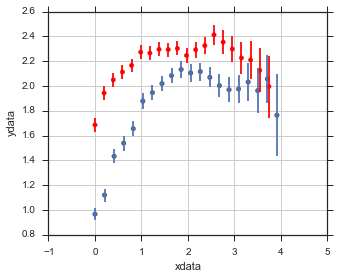

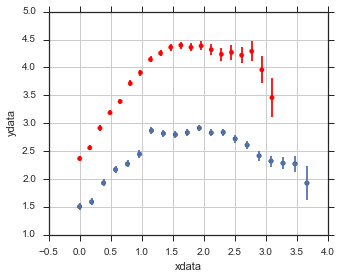

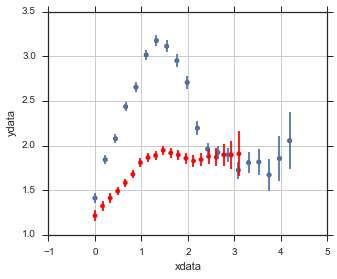

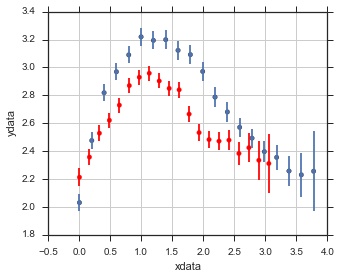

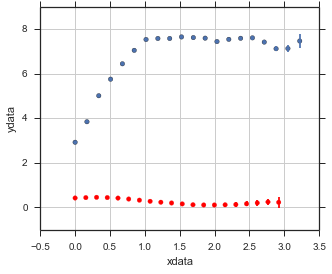

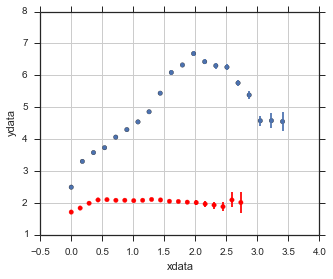

In [3]:
sns.despine()
sns.set_style("ticks")

filelist = []
check = files(halfHourlyData)
for names in check:
    filelist.append(names)

years = [2009, 2010, 2011, 2012, 2013, 2014]
for year in years:
    [intercept, slope, sigvalues_a, sigvalues_b, binnedDF_F] = fitBinnedLinRegression('Wjs', 'gapfilled',str(year), 230, 260,
                                                                         'GPP', 'VPD_F', 20)
    [intercept, slope, sigvalues_a, sigvalues_b, binnedDF_S] = fitBinnedLinRegression('Wjs', 'gapfilled',str(year), 100, 130,
                                                                         'GPP', 'VPD_F', 20)

    plt.figure
    fig, ax = plt.subplots(figsize=(5, 4))    # 1
    binnedDF_F.plot(ax = ax, x = 'xdata', y = 'ydata', yerr= binnedDF_F.error, kind = 'scatter')
    binnedDF_S.plot(ax = ax, x = 'xdata', y = 'ydata', yerr= binnedDF_S.error, kind = 'scatter', color = 'red')

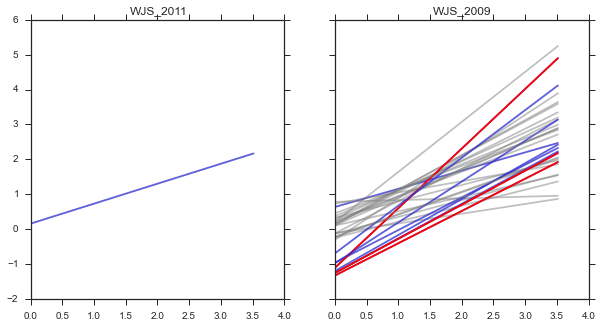

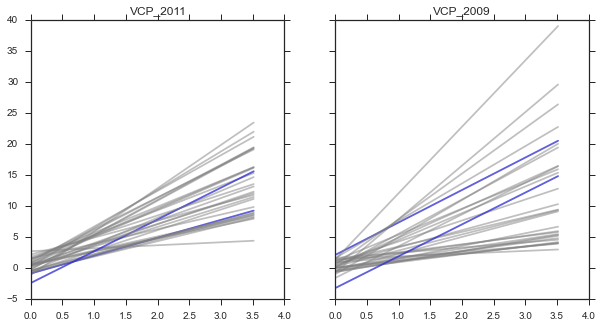

In [146]:
sns.despine()
sns.set_style("ticks")

filelist = []
check = files(halfHourlyData)
for names in check:
    filelist.append(names)

[intercept, slope, sigvalues_a, sigvalues_b, binnedDF] = fitBinnedLinRegression('Wjs', 'gapfilled','2011', 200, 230,
                                                                     'GPP', 'VPD_F', 10)
get_y = lambda a, b: a + b * x
x = numpy.arange(dailyData['VPD_F'].min(), dailyData['VPD_F'].max(), 0.1)


f1, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5), dpi = 300,sharey = True)
for idx in numpy.arange(0, len(sigvalues_a)):
    y = get_y(intercept[idx], slope[idx])
    ax1.plot(x,y,'-', color = 'gray', alpha = 0.5)
    if sigvalues_a [idx] < 0.05:
        if sigvalues_b [idx] < 0.05:
                ax1.plot(x,y,'-', color = 'blue', alpha = 0.5)
    if sigvalues_a [idx] < 0.001:
        if sigvalues_b [idx] < 0.001:
                ax1.plot(x,y,'-', color = 'red')
    ax1.set_title('WJS_2011')
    
[intercept, slope, sigvalues_a, sigvalues_b] = fitLinRegression('Wjs', 'gapfilled', '2009', 200, 230)
get_y = lambda a, b: a + b * x
x = numpy.arange(dailyData['VPD_F'].min(), dailyData['VPD_F'].max(), 0.1)


for idx in numpy.arange(0, len(sigvalues_a)):
    y = get_y(intercept[idx], slope[idx])
    ax2.plot(x,y,'-', color = 'gray', alpha = 0.5)
    if sigvalues_a [idx] < 0.05:
        if sigvalues_b [idx] < 0.05:
                ax2.plot(x,y,'-', color = 'blue', alpha = 0.5)
    if sigvalues_a [idx] < 0.001:
        if sigvalues_b [idx] < 0.001:
                ax2.plot(x,y,'-', color = 'red')
    ax2.set_title('WJS_2009')

                
[intercept, slope, sigvalues_a, sigvalues_b] = fitLinRegression('Vcp', 'gapfilled', '2011', 200, 230)
get_y = lambda a, b: a + b * x
x = numpy.arange(dailyData['VPD_F'].min(), dailyData['VPD_F'].max(), 0.1)

f2, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5), dpi = 300, sharey = True)
for idx in numpy.arange(0, len(sigvalues_a)):
    y = get_y(intercept[idx], slope[idx])
    ax1.plot(x,y,'-', color = 'gray', alpha = 0.5)
    if sigvalues_a [idx] < 0.05:
        if sigvalues_b [idx] < 0.05:
                ax1.plot(x,y,'-', color = 'blue', alpha = 0.5)
    if sigvalues_a [idx] < 0.001:
        if sigvalues_b [idx] < 0.001:
                ax1.plot(x,y,'-', color = 'red')
    ax1.set_title('VCP_2011')
    

                
[intercept, slope, sigvalues_a, sigvalues_b] = fitLinRegression('Vcp', 'gapfilled', '2009', 200, 230)
get_y = lambda a, b: a + b * x
x = numpy.arange(dailyData['VPD_F'].min(), dailyData['VPD_F'].max(), 0.1)

for idx in numpy.arange(0, len(sigvalues_a)):
    y = get_y(intercept[idx], slope[idx])
    ax2.plot(x,y,'-', color = 'gray', alpha = 0.5)
    if sigvalues_a [idx] < 0.05:
        if sigvalues_b [idx] < 0.05:
                ax2.plot(x,y,'-', color = 'blue', alpha = 0.5)
    if sigvalues_a [idx] < 0.001:
        if sigvalues_b [idx] < 0.001:
                ax2.plot(x,y,'-', color = 'red')
    ax2.set_title('VCP_2009')


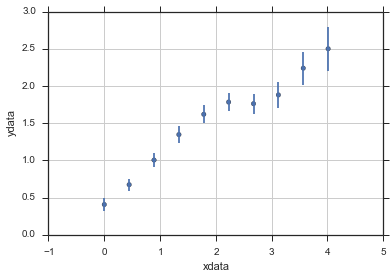

In [149]:
binnedDF.plot(x = 'xdata', y = 'ydata', yerr= 2*binnedDF.error, kind = 'scatter')